___
# Projeto 3 - Ciência dos dados
___

Nomes: Edivaldo Rangel, Gabriel Formario, João Pedro Araujo

Dataframes obtidos no link: https://www.kaggle.com/tmdb/tmdb-movie-metadata 

### Temos como objetivo nesse projeto analisar como as informações obtidas na ficha técnica de um filme podem influenciar em seu sucesso financeiro. Ao analisar os dados podemos descobrir quais dessas informações são mais tedenciosas.

### Com a devida análise, poderemos criar um preditor com base nesses dados(diretor, investimento, gênero do filme,etc) e ter uma noção de como ele se sairá financeiramente. Esse modelo preditor poderia ser utilizado por produtoras para ter expectativa de lucro, além de poder guiar novas produtoras em que tipo de equipe e gênero investir para uma maior garantia de sucesso.

# Predição de sucesso de um filme.

## Análise exploratória

In [1]:
%matplotlib notebook
%reset -f


import pandas as pd
import numpy as np
from scipy.stats import norm, probplot
import statsmodels.api as sm
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

from sklearn import preprocessing


In [2]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

In [3]:
filme = pd.read_csv("tmdb_5000_movies.csv")
creditos = pd.read_csv("tmdb_5000_credits.csv")

In [4]:
filme
filme2= filme.drop_duplicates(subset='title',keep=False)

In [5]:
data = filme2.set_index('title').join(creditos.set_index('title'))
data.columns

Index(['budget', 'genres', 'homepage', 'id', 'keywords', 'original_language',
       'original_title', 'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'vote_average', 'vote_count',
       'movie_id', 'cast', 'crew'],
      dtype='object')

In [6]:
data;

In [7]:
data.describe()

budget             id   popularity       revenue      runtime  \
count  4.797000e+03    4797.000000  4797.000000  4.797000e+03  4795.000000   
mean   2.906232e+07   57210.509485    21.492938  8.224613e+07   106.869447   
std    4.074008e+07   88735.919350    31.829961  1.628764e+08    22.621352   
min    0.000000e+00       5.000000     0.000000  0.000000e+00     0.000000   
25%    8.000000e+05    9021.000000     4.668910  0.000000e+00    94.000000   
50%    1.500000e+07   14631.000000    12.921594  1.917000e+07   103.000000   
75%    4.000000e+07   58626.000000    28.276480  9.292120e+07   117.000000   
max    3.800000e+08  459488.000000   875.581305  2.787965e+09   338.000000   

       vote_average    vote_count       movie_id  
count   4797.000000   4797.000000    4797.000000  
mean       6.091828    690.104023   57210.509485  
std        1.195237   1234.985528   88735.919350  
min        0.000000      0.000000       5.000000  
25%        5.600000     54.000000    9021.000000  
50%        6.200000    235.000000   14631.000000  
75%        6.800000    737.000000   58626.000000  
max       10.000000  13752.000000  459488.000000

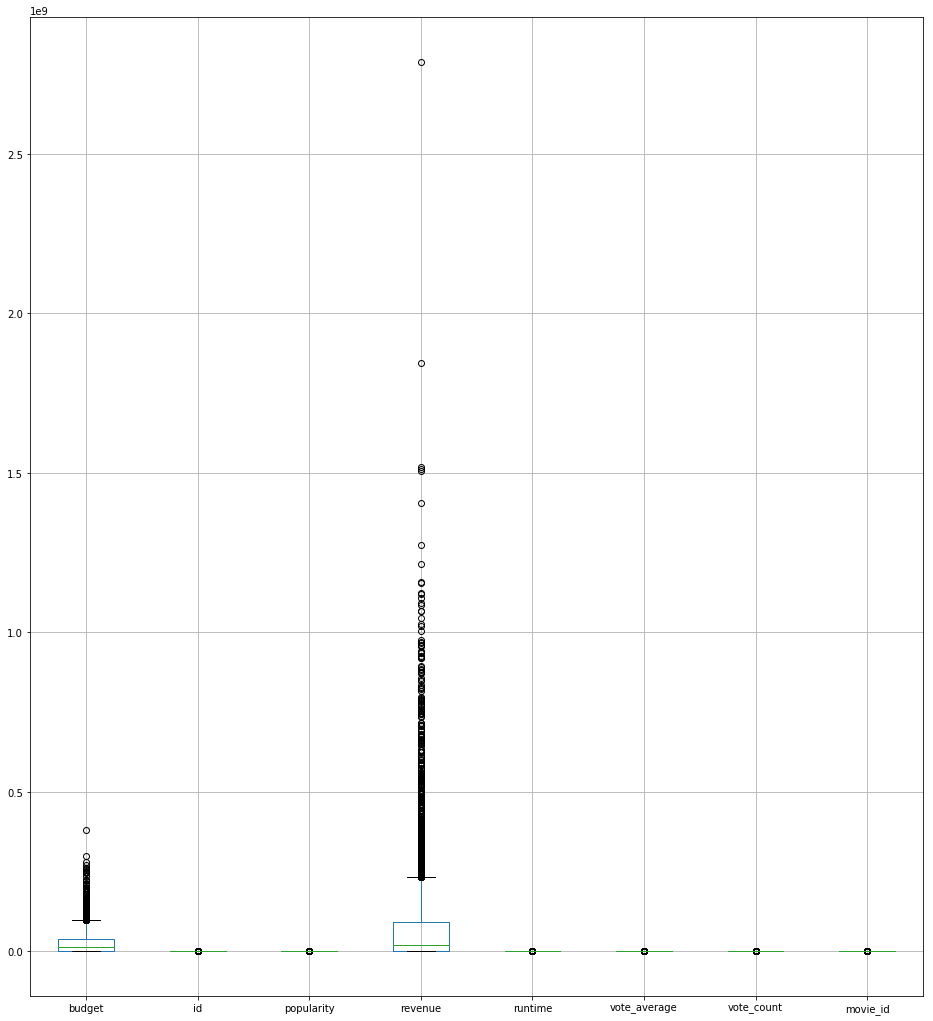

In [8]:
data.boxplot(figsize = (16,18));

In [9]:
rendimento = data.set_index("revenue")

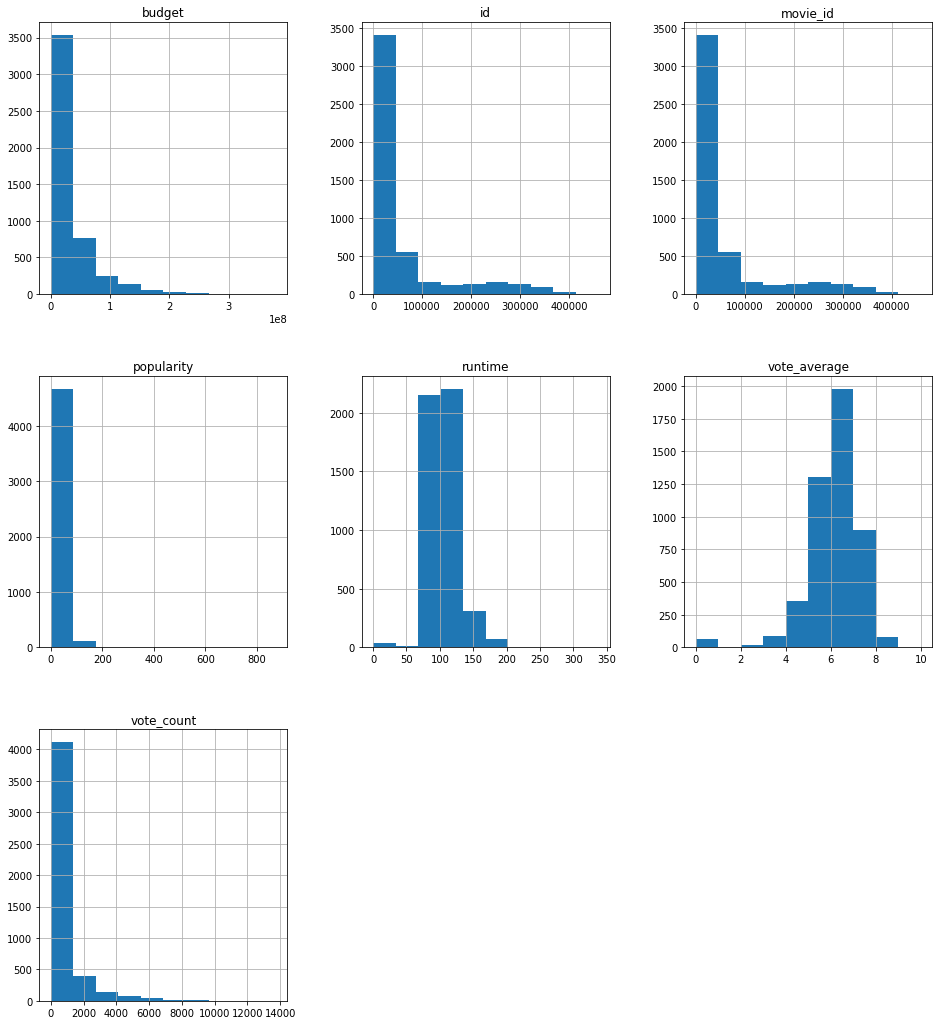

In [10]:
rendimento.hist(figsize = (16,18));

## Dummyfied para gêneros

In [11]:
dados_genero = []
for dado in range(len(data.genres)):
    dados_genero.append(data.genres.iloc[dado])
    
    
    
nomes_genero = []
for genero in dados_genero:
    for nome in eval(genero):
        nomes_genero.append(nome["name"])
        
    data[nome["name"]] = 1

lista_generos = list(dict.fromkeys(nomes_genero))
lista_generos


['Drama',
 'Mystery',
 'Horror',
 'Thriller',
 'Comedy',
 'Romance',
 'Science Fiction',
 'Family',
 'Action',
 'Crime',
 'Adventure',
 'History',
 'Fantasy',
 'War',
 'Music',
 'Documentary',
 'Western',
 'Animation',
 'TV Movie',
 'Foreign']

In [12]:
copia = data.copy()

In [13]:
for genero in lista_generos:
    copia[genero] = 0

In [14]:
copia.head(450);

In [15]:
for i in copia.index:
    gen = eval(copia.loc[i,"genres"])
    for l in gen:
        copia.loc[i,l['name']]=1
        
    

In [16]:
copia = copia.drop(columns=["movie_id","genres","id","keywords","original_language","original_title","production_companies",
                          "production_countries","spoken_languages","status","vote_count","cast","homepage","overview","release_date","runtime","tagline"])

copia

budget  popularity    revenue  \
title                                                                        
#Horror                                     1500000    2.815228          0   
(500) Days of Summer                        7500000   45.610993   60722734   
10 Cloverfield Lane                        15000000   53.698683  108286421   
10 Days in a Madhouse                       1200000    0.489271          0   
10 Things I Hate About You                 16000000   54.550275   53478166   
102 Dalmatians                             85000000    9.895061  183611771   
10th & Wolf                                 8000000    3.942464     143451   
11:14                                       6000000   15.048067          0   
12 Angry Men                                 350000   59.259204    1000000   
12 Rounds                                  20000000   15.661350   17280326   
12 Years a Slave                           20000000   95.922900  187000000   
127 Hours                                  18000000   52.464877   35692920   
13 Going on 30                             37000000   41.569541   96455697   
13 Hours: The Secret Soldiers of Benghazi  50000000   42.526529   69411370   
1408                                       25000000   35.169779   94679598   
15 Minutes                                 60000000   15.205371   56359980   
16 Blocks                                  55000000   32.310220   65664721   
16 to Life                                        0    0.108468          0   
17 Again                                   20000000   52.571674  136267476   
1776                                              0    1.807571          0   
1911                                       30000000    4.065212     108348   
1941                                       35000000   10.032626   31755742   
1982                                        1000000    0.175885          0   
2 Fast 2 Furious                           76000000   10.520961  236350661   
2 Guns                                     61000000   42.881415  131940411   
20 Dates                                          0    0.408073          0   
20 Feet from Stardom                        1000000    5.247956          0   
20,000 Leagues Under the Sea                5000000    9.358197   28200000   
200 Cigarettes                              6000000    3.561198    6852450   
2001: A Space Odyssey                      10500000   86.201184   68700000   
...                                             ...         ...        ...   
Young Adult                                12000000   16.183746   22939027   
Young Frankenstein                          2800000   36.444894   86273333   
Young Guns                                 13000000    9.499325   44726644   
Young Sherlock Holmes                      18000000    8.321586          0   
Your Highness                              49900000   21.408222   26121638   
Your Sister's Sister                         125000   12.833247    3200000   
Yours, Mine and Ours                              0    2.094151          0   
Youth in Revolt                            18000000   13.462544          0   
Z Storm                                           0    0.542814          0   
ZMD: Zombies of Mass Destruction                  0    1.563711          0   
Zack and Miri Make a Porno                 24000000   27.326466   42105111   
Zambezia                                   20000000   14.182301          0   
Zathura: A Space Adventure                 65000000   15.194239   64321501   
Zero Dark Thirty                           40000000   38.306954  132820716   
Zero Effect                                 5000000    2.732031    1980338   
Zipper                                            0    8.516229          0   
Zodiac                                     65000000   51.970905   84785914   
Zombie Hunter                                     0    3.418372          0   
Zombieland                                 23600000   57.300674  10

In [17]:
data_gen =  copia.copy()

data_gen

budget  popularity    revenue  \
title                                                                        
#Horror                                     1500000    2.815228          0   
(500) Days of Summer                        7500000   45.610993   60722734   
10 Cloverfield Lane                        15000000   53.698683  108286421   
10 Days in a Madhouse                       1200000    0.489271          0   
10 Things I Hate About You                 16000000   54.550275   53478166   
102 Dalmatians                             85000000    9.895061  183611771   
10th & Wolf                                 8000000    3.942464     143451   
11:14                                       6000000   15.048067          0   
12 Angry Men                                 350000   59.259204    1000000   
12 Rounds                                  20000000   15.661350   17280326   
12 Years a Slave                           20000000   95.922900  187000000   
127 Hours                                  18000000   52.464877   35692920   
13 Going on 30                             37000000   41.569541   96455697   
13 Hours: The Secret Soldiers of Benghazi  50000000   42.526529   69411370   
1408                                       25000000   35.169779   94679598   
15 Minutes                                 60000000   15.205371   56359980   
16 Blocks                                  55000000   32.310220   65664721   
16 to Life                                        0    0.108468          0   
17 Again                                   20000000   52.571674  136267476   
1776                                              0    1.807571          0   
1911                                       30000000    4.065212     108348   
1941                                       35000000   10.032626   31755742   
1982                                        1000000    0.175885          0   
2 Fast 2 Furious                           76000000   10.520961  236350661   
2 Guns                                     61000000   42.881415  131940411   
20 Dates                                          0    0.408073          0   
20 Feet from Stardom                        1000000    5.247956          0   
20,000 Leagues Under the Sea                5000000    9.358197   28200000   
200 Cigarettes                              6000000    3.561198    6852450   
2001: A Space Odyssey                      10500000   86.201184   68700000   
...                                             ...         ...        ...   
Young Adult                                12000000   16.183746   22939027   
Young Frankenstein                          2800000   36.444894   86273333   
Young Guns                                 13000000    9.499325   44726644   
Young Sherlock Holmes                      18000000    8.321586          0   
Your Highness                              49900000   21.408222   26121638   
Your Sister's Sister                         125000   12.833247    3200000   
Yours, Mine and Ours                              0    2.094151          0   
Youth in Revolt                            18000000   13.462544          0   
Z Storm                                           0    0.542814          0   
ZMD: Zombies of Mass Destruction                  0    1.563711          0   
Zack and Miri Make a Porno                 24000000   27.326466   42105111   
Zambezia                                   20000000   14.182301          0   
Zathura: A Space Adventure                 65000000   15.194239   64321501   
Zero Dark Thirty                           40000000   38.306954  132820716   
Zero Effect                                 5000000    2.732031    1980338   
Zipper                                            0    8.516229          0   
Zodiac                                     65000000   51.970905   84785914   
Zombie Hunter                                     0    3.418372          0   
Zombieland                                 23600000   57.300674  10

## Dummyfied para diretores

In [18]:
q = data.crew.iloc[338]
for l in eval(q):
    print(l)

{'credit_id': '5564a9c6c3a368072f00208f', 'department': 'Art', 'gender': 2, 'id': 5508, 'job': 'Production Design', 'name': 'Nelson Coates'}
{'credit_id': '5564a8c29251410608001a6d', 'department': 'Camera', 'gender': 2, 'id': 31856, 'job': 'Director of Photography', 'name': 'Brian J. Breheny'}
{'credit_id': '5564a8e59251414222002010', 'department': 'Production', 'gender': 1, 'id': 33437, 'job': 'Producer', 'name': 'Susan Cartsonis'}
{'credit_id': '5564a8ad92514141c7001e28', 'department': 'Sound', 'gender': 2, 'id': 37757, 'job': 'Original Music Composer', 'name': 'David Hirschfelder'}
{'credit_id': '52fe45d59251416c7506413d', 'department': 'Writing', 'gender': 1, 'id': 51680, 'job': 'Novel', 'name': 'Alice Hoffman'}
{'credit_id': '52fe45d59251416c75064137', 'department': 'Writing', 'gender': 1, 'id': 53014, 'job': 'Screenplay', 'name': 'Jessica Bendinger'}
{'credit_id': '52fe45d59251416c75064131', 'department': 'Writing', 'gender': 2, 'id': 63716, 'job': 'Screenplay', 'name': 'John Qua

In [19]:
s = []
for k in range(len(data_gen.crew)):
    s.append(data.crew.iloc[k])
print(s[0])

[{"credit_id": "545bbac70e0a261fb6002329", "department": "Writing", "gender": 1, "id": 61111, "job": "Screenplay", "name": "Tara Subkoff"}, {"credit_id": "545bbabf0e0a261fb9002212", "department": "Directing", "gender": 1, "id": 61111, "job": "Director", "name": "Tara Subkoff"}, {"credit_id": "545bbae4c3a36853500018a8", "department": "Production", "gender": 1, "id": 61111, "job": "Producer", "name": "Tara Subkoff"}, {"credit_id": "545bbad3c3a3685358001b92", "department": "Production", "gender": 0, "id": 1382445, "job": "Producer", "name": "Jason Ludman"}, {"credit_id": "545bbadbc3a368535d001e74", "department": "Production", "gender": 0, "id": 1382446, "job": "Producer", "name": "Oren Segal"}, {"credit_id": "545bbaf3c3a3685358001b9d", "department": "Production", "gender": 0, "id": 1382448, "job": "Producer", "name": "Brendan Walsh"}]


In [20]:
lista_diretor = []
for k in data_gen['crew']:
    for m in eval(k):
        if m['job'] == 'Director':
            lista_diretor.append(m['name'])

lista_diretor = set(lista_diretor)
lista_diretor

{'Julian Jarrold',
 'Rawson Marshall Thurber',
 'Bernardo Bertolucci',
 'Patrik Forsberg',
 'Alexandre Aja',
 'James Mottern',
 'Julian Schnabel',
 'Caryn Waechter',
 'Mike Leigh',
 'Corey Yuen Kwai',
 'Jake Kasdan',
 'Laurence Dunmore',
 'Jason Connery',
 'Warren Sheppard',
 'Rowdy Herrington',
 'Tim Fywell',
 'Takeshi Kitano',
 'Michael Curtiz',
 'Simon Wells',
 '张立 | Zhang Li',
 'Wolfgang Petersen',
 'Dan Mazer',
 'Lawrence Kasdan',
 'Susan Stroman',
 'Andrés Couturier',
 'John Simpson',
 'James L. Brooks',
 'Jean-Marc Vallée',
 'Michael Roemer',
 'George P. Cosmatos',
 'David Palmer',
 'Kat Coiro',
 'Gregory Poirier',
 'Daisy von Scherler Mayer',
 'Jon Poll',
 'Colin Trevorrow',
 'Anna Mastro',
 "Eddie O'Flaherty",
 'Jeff Garlin',
 'Fabián Bielinsky',
 'Michael Winner',
 'Kyle Balda',
 'George Sidney',
 'James Watkins',
 'Bong Joon-ho',
 'Travis Romero',
 'John Sayles',
 'David Bowers',
 'Jack Conway',
 'Christopher Roberts',
 "Pat O'Connor",
 'Gérard Krawczyk',
 'Andrew Marton',
 

In [21]:
for dire in lista_diretor:
    data_gen[dire] = 0
    
data_gen

budget  popularity    revenue  \
title                                                                        
#Horror                                     1500000    2.815228          0   
(500) Days of Summer                        7500000   45.610993   60722734   
10 Cloverfield Lane                        15000000   53.698683  108286421   
10 Days in a Madhouse                       1200000    0.489271          0   
10 Things I Hate About You                 16000000   54.550275   53478166   
102 Dalmatians                             85000000    9.895061  183611771   
10th & Wolf                                 8000000    3.942464     143451   
11:14                                       6000000   15.048067          0   
12 Angry Men                                 350000   59.259204    1000000   
12 Rounds                                  20000000   15.661350   17280326   
12 Years a Slave                           20000000   95.922900  187000000   
127 Hours                                  18000000   52.464877   35692920   
13 Going on 30                             37000000   41.569541   96455697   
13 Hours: The Secret Soldiers of Benghazi  50000000   42.526529   69411370   
1408                                       25000000   35.169779   94679598   
15 Minutes                                 60000000   15.205371   56359980   
16 Blocks                                  55000000   32.310220   65664721   
16 to Life                                        0    0.108468          0   
17 Again                                   20000000   52.571674  136267476   
1776                                              0    1.807571          0   
1911                                       30000000    4.065212     108348   
1941                                       35000000   10.032626   31755742   
1982                                        1000000    0.175885          0   
2 Fast 2 Furious                           76000000   10.520961  236350661   
2 Guns                                     61000000   42.881415  131940411   
20 Dates                                          0    0.408073          0   
20 Feet from Stardom                        1000000    5.247956          0   
20,000 Leagues Under the Sea                5000000    9.358197   28200000   
200 Cigarettes                              6000000    3.561198    6852450   
2001: A Space Odyssey                      10500000   86.201184   68700000   
...                                             ...         ...        ...   
Young Adult                                12000000   16.183746   22939027   
Young Frankenstein                          2800000   36.444894   86273333   
Young Guns                                 13000000    9.499325   44726644   
Young Sherlock Holmes                      18000000    8.321586          0   
Your Highness                              49900000   21.408222   26121638   
Your Sister's Sister                         125000   12.833247    3200000   
Yours, Mine and Ours                              0    2.094151          0   
Youth in Revolt                            18000000   13.462544          0   
Z Storm                                           0    0.542814          0   
ZMD: Zombies of Mass Destruction                  0    1.563711          0   
Zack and Miri Make a Porno                 24000000   27.326466   42105111   
Zambezia                                   20000000   14.182301          0   
Zathura: A Space Adventure                 65000000   15.194239   64321501   
Zero Dark Thirty                           40000000   38.306954  132820716   
Zero Effect                                 5000000    2.732031    1980338   
Zipper                                            0    8.516229          0   
Zodiac                                     65000000   51.970905   84785914   
Zombie Hunter                                     0    3.418372          0   
Zombieland                                 23600000   57.300674  10

In [22]:
eval(data_gen.loc['#Horror',"crew"])[0]

{'credit_id': '545bbac70e0a261fb6002329',
 'department': 'Writing',
 'gender': 1,
 'id': 61111,
 'job': 'Screenplay',
 'name': 'Tara Subkoff'}

In [23]:

def diretor (filme):
    for k in eval(data_gen.loc[filme,"crew"]):
        if k['job'] == 'Director':
            return k['name']

In [24]:
diretor('#Horror')

'Tara Subkoff'

In [25]:
for dire in lista_diretor:
    data_gen[dire] = 0

In [26]:
for z in data_gen.index:
    data_gen.loc[z, diretor(z)] = 1


In [27]:
data_gen.loc["#Horror", diretor("#Horror")] 

1

In [28]:
data_gen

budget  popularity    revenue  \
title                                                                        
#Horror                                     1500000    2.815228          0   
(500) Days of Summer                        7500000   45.610993   60722734   
10 Cloverfield Lane                        15000000   53.698683  108286421   
10 Days in a Madhouse                       1200000    0.489271          0   
10 Things I Hate About You                 16000000   54.550275   53478166   
102 Dalmatians                             85000000    9.895061  183611771   
10th & Wolf                                 8000000    3.942464     143451   
11:14                                       6000000   15.048067          0   
12 Angry Men                                 350000   59.259204    1000000   
12 Rounds                                  20000000   15.661350   17280326   
12 Years a Slave                           20000000   95.922900  187000000   
127 Hours                                  18000000   52.464877   35692920   
13 Going on 30                             37000000   41.569541   96455697   
13 Hours: The Secret Soldiers of Benghazi  50000000   42.526529   69411370   
1408                                       25000000   35.169779   94679598   
15 Minutes                                 60000000   15.205371   56359980   
16 Blocks                                  55000000   32.310220   65664721   
16 to Life                                        0    0.108468          0   
17 Again                                   20000000   52.571674  136267476   
1776                                              0    1.807571          0   
1911                                       30000000    4.065212     108348   
1941                                       35000000   10.032626   31755742   
1982                                        1000000    0.175885          0   
2 Fast 2 Furious                           76000000   10.520961  236350661   
2 Guns                                     61000000   42.881415  131940411   
20 Dates                                          0    0.408073          0   
20 Feet from Stardom                        1000000    5.247956          0   
20,000 Leagues Under the Sea                5000000    9.358197   28200000   
200 Cigarettes                              6000000    3.561198    6852450   
2001: A Space Odyssey                      10500000   86.201184   68700000   
...                                             ...         ...        ...   
Young Adult                                12000000   16.183746   22939027   
Young Frankenstein                          2800000   36.444894   86273333   
Young Guns                                 13000000    9.499325   44726644   
Young Sherlock Holmes                      18000000    8.321586          0   
Your Highness                              49900000   21.408222   26121638   
Your Sister's Sister                         125000   12.833247    3200000   
Yours, Mine and Ours                              0    2.094151          0   
Youth in Revolt                            18000000   13.462544          0   
Z Storm                                           0    0.542814          0   
ZMD: Zombies of Mass Destruction                  0    1.563711          0   
Zack and Miri Make a Porno                 24000000   27.326466   42105111   
Zambezia                                   20000000   14.182301          0   
Zathura: A Space Adventure                 65000000   15.194239   64321501   
Zero Dark Thirty                           40000000   38.306954  132820716   
Zero Effect                                 5000000    2.732031    1980338   
Zipper                                            0    8.516229          0   
Zodiac                                     65000000   51.970905   84785914   
Zombie Hunter                                     0    3.418372          0   
Zombieland                                 23600000   57.300674  10

In [30]:
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 100)
data_gen.dropna(axis='columns', inplace=True)

data_gen


budget  popularity    revenue  \
title                                                                         
#Horror                                      1500000    2.815228          0   
(500) Days of Summer                         7500000   45.610993   60722734   
10 Cloverfield Lane                         15000000   53.698683  108286421   
10 Days in a Madhouse                        1200000    0.489271          0   
10 Things I Hate About You                  16000000   54.550275   53478166   
102 Dalmatians                              85000000    9.895061  183611771   
10th & Wolf                                  8000000    3.942464     143451   
11:14                                        6000000   15.048067          0   
12 Angry Men                                  350000   59.259204    1000000   
12 Rounds                                   20000000   15.661350   17280326   
12 Years a Slave                            20000000   95.922900  187000000   
127 Hours                                   18000000   52.464877   35692920   
13 Going on 30                              37000000   41.569541   96455697   
13 Hours: The Secret Soldiers of Benghazi   50000000   42.526529   69411370   
1408                                        25000000   35.169779   94679598   
15 Minutes                                  60000000   15.205371   56359980   
16 Blocks                                   55000000   32.310220   65664721   
16 to Life                                         0    0.108468          0   
17 Again                                    20000000   52.571674  136267476   
1776                                               0    1.807571          0   
1911                                        30000000    4.065212     108348   
1941                                        35000000   10.032626   31755742   
1982                                         1000000    0.175885          0   
2 Fast 2 Furious                            76000000   10.520961  236350661   
2 Guns                                      61000000   42.881415  131940411   
20 Dates                                           0    0.408073          0   
20 Feet from Stardom                         1000000    5.247956          0   
20,000 Leagues Under the Sea                 5000000    9.358197   28200000   
200 Cigarettes                               6000000    3.561198    6852450   
2001: A Space Odyssey                       10500000   86.201184   68700000   
2012                                       200000000   45.274225  769653595   
2016: Obama's America                        2500000    0.973582   33400000   
2046                                        12000000   12.664787   19271312   
21                                          35000000   45.149948   69823199   
21 & Over                                   13000000   35.522027   48065672   
21 Grams                                    20000000   32.243357   60427839   
21 Jump Street                              42000000   62.714026  201585328   
22 Jump Street                              50000000   52.380982  188441614   
24 7: Twenty Four Seven                            0    0.744406          0   
25th Hour                                   15000000   30.196039   13060843   
27 Dresses                                  30000000   30.695228  160259319   
28 Days                                     43000000    5.418921          0   
28 Days Later                                5000000   45.490374   82719885   
28 Weeks Later                              15000000   34.759855   64238440   
2:13                                         3500000    1.271621          0   
3 Backyards                                        0    0.178170          0   
3 Days to Kill                              28000000   41.638961   52597999   
3 Ninjas Kick Back                                 0    2.645722          0   
3 Strikes                                    6000000    1.433692    9000000   
30 Days of Night 

In [31]:
data_gen.loc["2001: A Space Odyssey", diretor("2001: A Space Odyssey")] 

1

# Seperação entre teste e treino

In [32]:
RANDOM_SEED = 42
np.random.seed(RANDOM_SEED)

In [33]:
from sklearn import datasets, linear_model
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_squared_error, r2_score, mean_absolute_error
from sklearn.ensemble import RandomForestRegressor



In [34]:
def regress(X,Y):
    X_cp = sm.add_constant(X)
    model = sm.OLS(Y,X_cp)
    results = model.fit()
    return results

## Linear Regression 1 - Somente com os Genêros


In [35]:
X = copia.drop(columns=["revenue","crew"])
y = copia['revenue']


In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=RANDOM_SEED)

In [37]:
results = regress(X_train,y_train)
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                revenue   R-squared:                       0.646
Model:                            OLS   Adj. R-squared:                  0.644
Method:                 Least Squares   F-statistic:                     302.2
Date:                Thu, 21 Nov 2019   Prob (F-statistic):               0.00
Time:                        21:12:54   Log-Likelihood:                -76105.
No. Observations:                3837   AIC:                         1.523e+05
Df Residuals:                    3813   BIC:                         1.524e+05
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const           -5.676e+07   9.52e+06     -5.962      0.000   -7.54e+07   -3.81e+07
budget              2.1276      0.051     41.732      0.000       2.028       2.228
popularity       1.858e+06   5.98e+04     31.054      0.000    1.74e+06    1.98e+06
vote_average     8.641e+06   1.47e+06      5.861      0.000    5.75e+06    1.15e+07
Thriller        -1.333e+07   4.51e+06     -2.954      0.003   -2.22e+07   -4.48e+06
Romance          9.656e+06   4.51e+06      2.143      0.032    8.21e+05    1.85e+07
Drama            -1.51e+07   4.07e+06     -3.709      0.000   -2.31e+07   -7.12e+06
Family           1.512e+07   6.53e+06      2.317      0.021    2.32e+06    2.79e+07
History         -2.059e+07   8.83e+06     -2.332      0.020   -3.79e+07   -3.28e+06
War             -1.496e+07      1e+07     -1.494      0.135   -3.46e+07    4.67e+06
Comedy          -8.076e+06   4.04e+06     -1.997      0.046    -1.6e+07   -1.49e+05
Music           -1.312e+06   8.66e+06     -0.151      0.880   -1.83e+07    1.57e+07
Crime           -1.582e+07   5.06e+06     -3.128      0.002   -2.57e+07    -5.9e+06
Science Fiction -9.264e+06   5.61e+06     -1.653      0.098   -2.03e+07    1.73e+06
Adventure        1.752e+07   5.25e+06      3.339      0.001    7.23e+06    2.78e+07
Documentary        5.1e+06   1.16e+07      0.439      0.661   -1.77e+07    2.79e+07
Action          -7.702e+06   4.66e+06     -1.651      0.099   -1.68e+07    1.44e+06
Mystery         -4.986e+06    6.5e+06     -0.767      0.443   -1.77e+07    7.76e+06
Western          -3.13e+07   1.27e+07     -2.459      0.014   -5.62e+07   -6.35e+06
Fantasy         -6.508e+06   6.07e+06     -1.072      0.284   -1.84e+07     5.4e+06
Horror           2.813e+06   5.93e+06      0.474      0.635   -8.82e+06    1.44e+07
TV Movie         2.342e+05   3.78e+07      0.006      0.995   -7.39e+07    7.44e+07
Foreign          1.757e+07   2.01e+07      0.873      0.383   -2.19e+07     5.7e+07
Animation        3.086e+06   9.03e+06      0.342      0.733   -1.46e+07    2.08e+07
==============================================================================
Omnibus:                     3646.612   Durbin-Watson:                   1.982
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           640879.594
Skew:                           4.038   Prob(JB):                         0.00
Kurtosis:                      65.797   Cond. No.                     1.19e+09
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.19e+09. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Random Forest Regression  1

In [38]:
rf = RandomForestRegressor(n_estimators = 1000, random_state = RANDOM_SEED)

In [39]:
model = rf.fit(X_train,y_train)

In [40]:
y_pred = model.predict(X_test)

In [41]:
yt=y_test.astype("float").values

In [42]:
print('R2_Score: {}'.format(r2_score(yt, y_pred)))

R2_Score: 0.6531525124460029


In [43]:
print('Mean Absolute Error:{}'.format(mean_absolute_error(yt, y_pred)))

Mean Absolute Error:42746905.38287812


## Linear Regression 2 - Gêneros + Diretores


In [44]:
X2 = data_gen.drop(columns=["revenue","crew"])
y = data_gen["revenue"]

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X2, y, test_size=0.2, random_state=RANDOM_SEED)

In [47]:
results = regress(X_train,y_train)
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                revenue   R-squared:                       0.800
Model:                            OLS   Adj. R-squared:                  0.566
Method:                 Least Squares   F-statistic:                     3.416
Date:                Thu, 21 Nov 2019   Prob (F-statistic):          1.65e-145
Time:                        21:13:54   Log-Likelihood:                -75008.
No. Observations:                3837   AIC:                         1.542e+05
Df Residuals:                    1767   BIC:                         1.671e+05
Df Model:                        2069                                         
Covariance Type:            nonrobust                                         
====================================================================================================
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const                            -6.968e+07   2.51e+07     -2.775      0.006   -1.19e+08   -2.04e+07
budget                               1.9226      0.087     22.095      0.000       1.752       2.093
popularity                         2.05e+06   1.15e+05     17.895      0.000    1.82e+06    2.27e+06
vote_average                      2.235e+07   3.54e+06      6.310      0.000    1.54e+07    2.93e+07
Thriller                         -1.532e+07   7.67e+06     -1.997      0.046   -3.04e+07   -2.77e+05
Romance                           1.346e+07   7.49e+06      1.798      0.072   -1.22e+06    2.81e+07
Drama                            -2.535e+07   7.16e+06     -3.540      0.000   -3.94e+07   -1.13e+07
Family                            1.817e+07    1.2e+07      1.520      0.129   -5.27e+06    4.16e+07
History                              -3e+07   1.42e+07     -2.111      0.035   -5.79e+07   -2.12e+06
War                              -1.298e+07   1.52e+07     -0.855      0.392   -4.28e+07    1.68e+07
Comedy                           -5.086e+06   8.44e+06     -0.603      0.547   -2.16e+07    1.15e+07
Music                             1.361e+06   1.59e+07      0.085      0.932   -2.99e+07    3.26e+07
Crime                            -8.666e+06   8.23e+06     -1.053      0.292   -2.48e+07    7.48e+06
Science Fiction                  -1.073e+07   9.55e+06     -1.124      0.261   -2.95e+07    7.99e+06
Adventure                         1.529e+07   8.36e+06      1.830      0.067    -1.1e+06    3.17e+07
Documentary                        9.96e+06   3.59e+07      0.277      0.782   -6.05e+07    8.04e+07
Action                           -6.346e+05   8.06e+06     -0.079      0.937   -1.64e+07    1.52e+07
Mystery                           1.803e+07   1.02e+07      1.774      0.076   -1.91e+06     3.8e+07
Western                          -5.819e+07   2.27e+07     -2.566      0.010   -1.03e+08   -1.37e+07
Fantasy                           1.333e+07      1e+07      1.331      0.183   -6.31e+06     3.3e+07
Horror                           -5.938e+05   1.22e+07     -0.049      0.961   -2.45e+07    2.33e+07
TV Movie                           3.01e+07   1.02e+08      0.294      0.769   -1.71e+08    2.31e+08
Foreign                          -1.341e+07   5.02e+07     -0.267      0.789   -1.12e+08     8.5e+07
Animation                        -1.972e+07   2.49e+07     -0.792      0.429   -6.86e+07    2.91e+07
Julian Jarrold                   -8.736e+07   8.24e+07     -1.061      0.289   -2.49e+08    7.42e+07
Rawson Marshall Thurber          -4.315e+07   6.89e+07     -0.627      0.531   -1.78e+08    9.19e+07
Bernardo Bertolucci              -8.401e+07   1.14e+08     -0.736      0.462   -3.08e+08     1.4e+08
Patrik Forsberg                      0.0294      0.36

## Random Forest Regression 2

In [48]:
rf = RandomForestRegressor(n_estimators = 1000, random_state = RANDOM_SEED)

In [49]:
model = rf.fit(X_train,y_train)

 **O código acima demora um cu pra rodar n fica rodando sa porra todo hora é NOIS**

In [50]:
y_pred = model.predict(X_test)

In [51]:
yt=y_test.astype("float").values

In [52]:
print('R2_Score: {}'.format(r2_score(yt, y_pred)))

R2_Score: 0.6630064058802971


In [53]:
print('Mean Absolute Error:{}'.format(mean_absolute_error(yt, y_pred)))

Mean Absolute Error:38915187.09727917


In [ ]:
# tenta analisar os alguns pvalues ou alguns params ae # eh nois n esquece de apagar edivas